In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
idf = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
idf.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
idf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
idf.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [5]:
idf.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
def convert_labels(row):
    if(row.species == "setosa"):
        row["out_label"] = 1
    elif(row.species == "versicolor"):
        row["out_label"] = 2
    else:
        row["out_label"] = 3
    return row

In [7]:
#df = idf.apply(convert_labels, axis = 1)
one_hot_encoded_df = pd.get_dummies(idf.species)

In [8]:
one_hot_encoded_df.head(5)


,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [9]:
df = idf.join(one_hot_encoded_df)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [10]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [11]:
features_np = df.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy().T
expected_label_np = df.loc[:, ["setosa", "versicolor", "virginica"]].to_numpy().T

In [12]:
print(features_np.shape)
print(expected_label_np.shape)

(4, 150)
(3, 150)


In [13]:
print(expected_label_np[:, 1:5])
print(features_np[:, 1:5])


[[1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]
[[4.9 4.7 4.6 5. ]
 [3.  3.2 3.1 3.6]
 [1.4 1.3 1.5 1.4]
 [0.2 0.2 0.2 0.2]]


In [14]:
np.random.seed(2)
layer_dims = [4, 5, 4, 3]

In [15]:
def initialize_parameters(layer_dims):
    #[4, 4, 3] 3  layers with one input layer of 4 units and one hidden layer of 4 units and a output layer of 3 units
    parameters = {}
    for i in range(len(layer_dims) - 1):
        parameters["W" + str(i + 1)] = np.random.randn(layer_dims[i+1], layer_dims[i]) * 0.01
        parameters["B" + str(i + 1)] = np.zeros((layer_dims[i+1], 1))
    num_of_layers = len(parameters) // 2
    return parameters, num_of_layers;


In [16]:
parameters, num_of_layers = initialize_parameters(layer_dims)
print(parameters)
        

{'W1': array([[-4.16757847e-03, -5.62668272e-04, -2.13619610e-02,
         1.64027081e-02],
       [-1.79343559e-02, -8.41747366e-03,  5.02881417e-03,
        -1.24528809e-02],
       [-1.05795222e-02, -9.09007615e-03,  5.51454045e-03,
         2.29220801e-02],
       [ 4.15393930e-04, -1.11792545e-02,  5.39058321e-03,
        -5.96159700e-03],
       [-1.91304965e-04,  1.17500122e-02, -7.47870949e-03,
         9.02525097e-05]]), 'B1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-8.78107893e-03, -1.56434170e-03,  2.56570452e-03,
        -9.88779049e-03, -3.38821966e-03],
       [-2.36184031e-03, -6.37655012e-03, -1.18761229e-02,
        -1.42121723e-02, -1.53495196e-03],
       [-2.69056960e-03,  2.23136679e-02, -2.43476758e-02,
         1.12726505e-03,  3.70444537e-03],
       [ 1.35963386e-02,  5.01857207e-03, -8.44213704e-03,
         9.76147160e-08,  5.42352572e-03]]), 'B2': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W3': array([[-0.

In [22]:
for i in range(len(parameters) // 2, 0, -1):
    print("W" + str(i) + " : " + str(parameters["W" + str(i)].shape))
    print("B" + str(i) + " : " + str(parameters["B" + str(i)].shape))
    
print(num_of_layers)

W3 : (3, 4)
B3 : (3, 1)
W2 : (4, 5)
B2 : (4, 1)
W1 : (5, 4)
B1 : (5, 1)
3


In [18]:
print(expected_label_np[:, 1:5])
print(features_np[:, 1:5])

X = features_np
Y = expected_label_np

[[1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]
[[4.9 4.7 4.6 5. ]
 [3.  3.2 3.1 3.6]
 [1.4 1.3 1.5 1.4]
 [0.2 0.2 0.2 0.2]]


In [24]:
##defining activations
def relu_activation(np_ip):
    np_op = np.maximum(np_ip, 0)
    return np_op;

def sigmoid_activation(np_ip):
    np_op = 1.0/(1 + np.exp(-1.0 * np_ip))
    return np_op;

def softmax_activation(np_ip):
    np_op = np.exp(np_ip)/np.sum(np.exp(np_ip), axis = 0)
    return np_op
    

In [23]:
def compute_forward_for_single_layer(W, B, X, activation):
    
    Z = np.dot(W, X) + B
    A = np.zeros(Z.shape)
    if(activation == "relu"):
        A = relu_activation(Z)
    elif(activation == "sigmoid"):
        A = sigmoid_activation(Z)
    elif(activation == "softmax"):
        A = softmax_activation(Z)
      
    return Z, A;
    

In [25]:
#Testing activation function
def activation_fnc_unit_test():
    tmp = np.random.randn(4,3)
    print(tmp)
    np_op = softmax_activation(tmp)
    print(np_op)
    np_op = sigmoid_activation(tmp)
    print(np_op)
    np_op = relu_activation(tmp)
    print(np_op)
    return

    
def singlelayer_forward_unit_test():
    tmp = np.random.randn(4,3)
    z, a = compute_forward_for_single_layer(np.random.randn(4,3), np.random.randn(4,1) * 0.1, np.random.randn(3, 1) * .5, "softmax")
    print(z)
    print(a)
    return

#singlelayer_forward_unit_test()
#activation_fnc_unit_test

In [26]:
def forward_prop(parameters, X, activations_lst):
    cache = {}
    num_layers = len(parameters) // 2
    cache["Z0"] = X
    cache["A0"] = X
    
    #Calculate output for hidden layers
    for i in range(1, num_layers):
        Z , A = compute_forward_for_single_layer(parameters["W" + str(i)], parameters["B" + str(i)], cache["Z" + str(i-1)], activations_lst[0])
        cache["Z" + str(i)] = Z
        cache["A" + str(i)] = A
    
    #Calculate output for last output layer
    cache["Z" + str(num_layers)], cache["A" + str(num_layers)] = compute_forward_for_single_layer(parameters["W" + str(num_layers)], parameters["B" + str(num_layers)], cache["Z" + str(num_layers-1)], activations_lst[1])
    
    return cache
    

In [31]:
activations_lst = ["relu", "softmax"]
cache = forward_prop(parameters, X, activations_lst)
for i in range(len(parameters) // 2, 0, -1):
    print("Z" + str(i) + " : " + str(cache["Z" + str(i)].shape))
    print("A" + str(i) + " : " + str(cache["A" + str(i)].shape))
print("Y:" + str(Y.shape))

Z3 : (3, 150)
A3 : (3, 150)
Z2 : (4, 150)
A2 : (4, 150)
Z1 : (5, 150)
A1 : (5, 150)
Y:(3, 150)


In [28]:
Y_hat = cache["A" + str(num_of_layers)]
print(cache["Z0"][:, 1:5])
parameters["W1"]

[[4.9 4.7 4.6 5. ]
 [3.  3.2 3.1 3.6]
 [1.4 1.3 1.5 1.4]
 [0.2 0.2 0.2 0.2]]


array([[-4.16757847e-03, -5.62668272e-04, -2.13619610e-02,
         1.64027081e-02],
       [-1.79343559e-02, -8.41747366e-03,  5.02881417e-03,
        -1.24528809e-02],
       [-1.05795222e-02, -9.09007615e-03,  5.51454045e-03,
         2.29220801e-02],
       [ 4.15393930e-04, -1.11792545e-02,  5.39058321e-03,
        -5.96159700e-03],
       [-1.91304965e-04,  1.17500122e-02, -7.47870949e-03,
         9.02525097e-05]])

In [29]:
def calculate_cost(Y_hat, Y):
    m = Y.shape[1]
    c = Y.shape[0]
    loss =  np.sum(-1.0 * Y * np.log(Y_hat)/ np.log(c), axis = 0).reshape(1,m)
    print(loss[:, 1:5])
    cost = (1.0 / m) * np.sum(loss, axis = 1).item()
    
    #print("cost: " + str(cost))
    return cost


In [32]:
cost = calculate_cost(Y_hat, Y)
cost

[[0.99998795 0.99998765 0.99998916 0.99998686]]


1.0000017861311654

In [33]:
def relu_derivative(np_ip):
    gradient = np.where(np_ip > 0, 1, 0)
    return gradient

def sigmoid_derivative(np_ip):
    gradient = np_ip * (1 - np_ip)
    return gradient

def softmax_derivative(np_ip, predicted):
    ip1 = np_ip
    gradient = np.zeros_like(np_ip)
    
    tmp1 = np.multiply(ip1, predicted)
    
    ip2 = ip1[[1, 2, 0], :]
    tmp2 = np.multiply(ip2, predicted)
    
    ip3 = ip1[[2, 0, 1], :]
    tmp3 = np.multiply(ip3, predicted)
    
    gradient[0, :] = tmp1[0, :] + tmp3[1, :] + tmp2[2, :] - predicted[0, :]
    gradient[1, :] = tmp2[0, :] + tmp1[1, :] + tmp3[2, :] - predicted[1, :]
    gradient[2, :] = tmp3[0, :] + tmp2[1, :] + tmp1[2, :] - predicted[2, :]
    
    return gradient


In [34]:
Y_hat.shape

(3, 150)

In [35]:
Y.shape

(3, 150)

In [36]:
softmax_derivative(Y_hat, Y).shape

(3, 150)

In [37]:
def compute_backward_for_single_layer(A_curr, Y, A_prev, W, dA, activation):
    m = A_curr.shape[1]
    dZ = None; dW = None; dB = None; dA_prev = None
    
    if(activation == "softmax"):
        dZ = softmax_derivative(A_curr, Y)
        dW = (1.0/m) * np.dot(dZ, A_prev.T)
        dB = (1.0/m) * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ)
        
    elif(activation == "relu"):   
        
        dZ = np.multiply(dA, relu_derivative(A_curr))
        
        assert(dA.shape == A_curr.shape)
        dW = (1.0/m) * np.dot(dZ, A_prev.T)
        dB = (1.0/m) * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ) 
        
    return dZ, dW, dB, dA_prev
        
    
    

In [ ]:
#dZ, dW, dB, dA_prev = compute_backward_for_single_layer(cache["A2"], Y, cache["A1"], parameters["W2"], "dA", "softmax")

In [ ]:
#dA_prev.shape

In [ ]:
#dW.shape

In [41]:
def backward_prop(Y_hat, Y, cache, activations_lst):
    grads = {}
    
    ## for output layer
    grads["dZ" + str(num_of_layers)], grads["dW" + str(num_of_layers)], grads["dB" + str(num_of_layers)], grads["dA" + str(num_of_layers - 1)] = compute_backward_for_single_layer(Y_hat, Y, cache["A" + str(num_of_layers-1)], parameters["W" + str(num_of_layers)], None, "softmax")
    print("dZ"  + str(num_of_layers) + ": " + str(grads["dZ" + str(num_of_layers)].shape ))
    print("W"  + str(num_of_layers) + ": "  + str(parameters["W" + str(num_of_layers)].shape))
    print("dA" + str(num_of_layers - 1) + ": " + str(grads["dA" + str(num_of_layers - 1)].shape))
    ## for hidden layers
    for i in range(num_of_layers-1, 0, -1):
        grads["dZ" + str(i)], grads["dW" + str(i)], grads["dB" + str(i)], grads["dA" + str(i - 1)] = compute_backward_for_single_layer(cache["A" + str(i)], Y, cache["A" + str(i-1)], parameters["W" + str(i)], grads["dA" + str(i)] , "relu")
    
    return grads

In [42]:
grads = backward_prop(Y_hat, Y, cache, activations_lst)
num_of_layers

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)


3

In [43]:
def update_parameters(grads, parameters, learning_rate):
    
    for i in range(num_of_layers, 0, -1):
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate * grads["dW" + str(i)]
        parameters["B" + str(i)] = parameters["B" + str(i)] - learning_rate * grads["dB" + str(i)]
    
    return


In [44]:
def nn_model(X, Y, layer_dims, learning_rate, epochs, activations_lst, print_cost):
    parameters, num_of_layers = initialize_parameters(layer_dims)
    cost_lst = []
    for i in range(epochs):        
        cache = forward_prop(parameters, X, activations_lst)
        print(parameters["W1"].shape)
        print(parameters["W2"].shape)
        print(cache["A1"].shape)
        print(cache["A2"].shape)
        Y_hat = cache["A" + str(num_of_layers)]
        cost = calculate_cost(Y_hat, Y)
        grads = backward_prop(Y_hat, Y, cache, activations_lst)
        update_parameters(grads, parameters, learning_rate)
        
        cost_lst.append(cost)
        
        if(print_cost == True and (i % 1000) == 0):
            print("cost: " + cost)
            print(parameters["W1"])
            print(parameters["W" + str(num_of_layers-1)])
            print(parameters["B1"])
            print(parameters["B" + str(num_of_layers-1)])
    return cost_lst


In [45]:
cost_lst = nn_model(X, Y, layer_dims, learning_rate = 0.2, epochs = 10000, activations_lst = ["relu", "softmax"], print_cost = False)

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00001104 1.00001072 1.00001067 1.00001155]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00001048 1.00001016 1.00001011 1.00001099]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00000982 1.0000095  1.00000945 1.00001034]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.0000092  1.00000888 1.00000883 1.00000972]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00000849 1.00000816 1.00000811 1.00000901]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00000782 1.00000749 1.00000744 1.00000834]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00000719 1.00000687 1.00000681 1.00000772]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.0000066  1.00000628 1.00000623 1.00000714]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[1.00000605 1.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999632 0.99999588 0.99999579 0.99999719]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999629 0.99999586 0.99999577 0.99999717]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999627 0.99999583 0.99999574 0.99999715]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999625 0.99999581 0.99999572 0.99999713]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999622 0.99999578 0.99999569 0.99999711]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999962  0.99999576 0.99999567 0.99999709]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999618 0.99999574 0.99999564 0.99999707]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999615 0.99999571 0.99999562 0.99999705]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999386 0.9999933  0.99999314 0.99999516]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999384 0.99999327 0.99999311 0.99999514]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999381 0.99999325 0.99999308 0.99999511]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999378 0.99999322 0.99999305 0.99999509]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999375 0.99999319 0.99999302 0.99999507]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999372 0.99999316 0.99999299 0.99999504]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999369 0.99999313 0.99999296 0.99999502]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999367 0.9999931  0.99999293 0.999995  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99999364 0.9

[[0.99998988 0.99998911 0.99998885 0.99999186]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998984 0.99998906 0.9999888  0.99999182]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998979 0.99998901 0.99998875 0.99999178]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998974 0.99998896 0.9999887  0.99999174]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999897  0.99998891 0.99998865 0.9999917 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998965 0.99998887 0.9999886  0.99999166]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998961 0.99998882 0.99998855 0.99999162]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998956 0.99998877 0.9999885  0.99999159]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998951 0.99998872 0.99998845 0.99999155]]


dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998384 0.99998274 0.99998239 0.99998673]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998377 0.99998266 0.99998231 0.99998667]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998383 0.99998272 0.99998236 0.99998674]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998375 0.99998263 0.99998227 0.99998666]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998366 0.99998254 0.99998219 0.99998659]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998358 0.99998245 0.9999821  0.99998652]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998349 0.99998236 0.99998201 0.99998644]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99998341 0.99998227 0.99998192 0.99998637]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

[[0.99997576 0.99997419 0.99997379 0.99997974]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997563 0.99997406 0.99997366 0.99997963]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997551 0.99997393 0.99997353 0.99997952]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997538 0.9999738  0.99997339 0.9999794 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997526 0.99997366 0.99997326 0.99997929]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997513 0.99997353 0.99997313 0.99997918]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997501 0.9999734  0.99997299 0.99997907]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997488 0.99997327 0.99997286 0.99997896]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99997475 0.99997313 0.99997273 0.99997885]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996518 0.99996301 0.99996261 0.9999704 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.999965   0.99996282 0.99996242 0.99997023]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996481 0.99996263 0.99996223 0.99997007]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996476 0.99996257 0.99996217 0.99997003]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996457 0.99996236 0.99996197 0.99996986]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996438 0.99996216 0.99996176 0.99996969]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996418 0.99996196 0.99996156 0.99996951]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99996399 0.99996176 0.99996136 0.99996934]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999638  0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999453  0.999942   0.99994172 0.99995255]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994503 0.99994171 0.99994144 0.99995231]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994474 0.99994141 0.99994114 0.99995205]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994447 0.99994113 0.99994086 0.99995181]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994419 0.99994083 0.99994056 0.99995155]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999439  0.99994053 0.99994026 0.99995129]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994363 0.99994024 0.99993998 0.99995104]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994334 0.99993993 0.99993967 0.99995078]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99994307 0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9999162  0.9999112  0.99991126 0.99992613]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991578 0.99991076 0.99991083 0.99992575]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991537 0.99991032 0.99991039 0.99992537]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991495 0.99990987 0.99990995 0.99992499]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991453 0.99990943 0.99990952 0.9999246 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991411 0.99990898 0.99990908 0.99992422]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991369 0.99990854 0.99990863 0.99992383]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991326 0.99990809 0.99990819 0.99992344]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99991284 0.9

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99985897 0.99985057 0.99985158 0.99987353]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99985828 0.99984984 0.99985086 0.99987289]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99985759 0.9998491  0.99985014 0.99987225]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9998569  0.99984837 0.99984942 0.99987161]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9998562  0.99984763 0.9998487  0.99987097]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99985551 0.99984689 0.99984797 0.99987032]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99985481 0.99984615 0.99984724 0.99986967]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9998541  0.99984541 0.99984651 0.99986902]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99978135 0.99976828 0.9997709  0.99980144]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99978029 0.99976716 0.99976981 0.99980045]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977938 0.99976619 0.99976885 0.99979961]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977831 0.99976505 0.99976774 0.99979861]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977725 0.99976393 0.99976665 0.99979763]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977617 0.99976279 0.99976553 0.99979662]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977511 0.99976167 0.99976443 0.99979563]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99977403 0.99976051 0.9997633  0.99979461]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99967478 0.99965523 0.99966041 0.99970173]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99967326 0.99965362 0.99965883 0.9997003 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99967173 0.999652   0.99965725 0.99969886]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99967019 0.99965037 0.99965566 0.99969742]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99966865 0.99964874 0.99965406 0.99969598]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99966711 0.9996471  0.99965246 0.99969452]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99966556 0.99964545 0.99965085 0.99969307]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.999664   0.9996438  0.99964924 0.9996916 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99952207 0.99949319 0.99950241 0.99955792]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99951988 0.99949087 0.99950015 0.99955585]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99951769 0.99948854 0.99949788 0.99955378]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99951551 0.99948623 0.99949563 0.99955172]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99951327 0.99948385 0.99949331 0.9995496 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99951108 0.99948153 0.99949105 0.99954753]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99950882 0.99947913 0.99948872 0.9995454 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99950658 0.99947676 0.9994864  0.99954328]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99924639 0.99920056 0.99921777 0.99929666]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9992431  0.99919706 0.99921438 0.99929353]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99923976 0.99919352 0.99921093 0.99929036]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99923641 0.99918995 0.99920748 0.99928717]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99923304 0.99918638 0.999204   0.99928397]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99922976 0.9991829  0.99920062 0.99928086]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99922636 0.99917929 0.99919712 0.99927763]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99922295 0.99917567 0.9991936  0.99927438]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99886352 0.99879402 0.99882321 0.99893176]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99885867 0.99878887 0.99881822 0.99892712]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99885381 0.9987837  0.99881321 0.99892247]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99884892 0.99877851 0.99880817 0.99891781]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99884402 0.9987733  0.99880313 0.99891312]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99883909 0.99876807 0.99879806 0.99890842]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99883415 0.99876283 0.99879297 0.99890369]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99882919 0.99875756 0.99878786 0.99889895]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99833668 0.99823447 0.99828113 0.99842726]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99832982 0.99822719 0.99827408 0.99842068]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99832301 0.99821995 0.99826707 0.99841414]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9983161  0.99821261 0.99825996 0.99840751]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99830916 0.99820524 0.99825283 0.99840085]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9983022  0.99819785 0.99824568 0.99839417]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99829521 0.99819042 0.99823849 0.99838747]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9982882  0.99818298 0.99823128 0.99838074]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99828117 0.9

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99762449 0.99747799 0.99754935 0.99774249]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99761514 0.99746805 0.99753974 0.99773349]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99760562 0.99745793 0.99752996 0.99772431]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99759606 0.99744777 0.99752014 0.9977151 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99758647 0.99743759 0.9975103  0.99770586]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99757684 0.99742736 0.99750041 0.99769659]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99756719 0.99741711 0.9974905  0.99768729]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9975575  0.99740682 0.99748055 0.99767795]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99671354 0.99651016 0.99661438 0.99686362]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99670088 0.99649671 0.99660139 0.99685139]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99668818 0.99648322 0.99658836 0.99683912]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99667543 0.99646967 0.99657529 0.99682681]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99666265 0.9964561  0.99656218 0.99681445]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99664982 0.99644246 0.99654902 0.99680205]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99663695 0.99642878 0.99653581 0.99678961]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99662403 0.99641505 0.99652256 0.99677712]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99524339 0.99494812 0.99510718 0.99544051]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99522572 0.99492935 0.99508908 0.99542338]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.995208   0.99491052 0.99507093 0.9954062 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99519022 0.99489164 0.99505272 0.99538896]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9951724  0.9948727  0.99503445 0.99537168]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99515451 0.9948537  0.99501613 0.99535433]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99513658 0.99483464 0.99499775 0.99533694]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99511858 0.99481553 0.99497932 0.99531949]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99510044 0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99336006 0.99294693 0.99317844 0.99361178]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99333636 0.99292176 0.99315419 0.99358875]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9933126  0.99289651 0.99312987 0.99356564]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99328877 0.99287119 0.99310547 0.99354246]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99326486 0.99284579 0.993081   0.99351922]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99324088 0.99282031 0.99305646 0.9934959 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99321684 0.99279476 0.99303185 0.99347251]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9931926  0.99276902 0.99300704 0.99344893]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99316842 0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99059517 0.990009   0.99034968 0.99091936]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99056315 0.98997496 0.99031693 0.99088814]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99053103 0.98994083 0.99028409 0.99085682]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99049881 0.98990659 0.99025114 0.99082541]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9904665  0.98987225 0.99021809 0.9907939 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99043408 0.9898378  0.99018494 0.99076229]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99040157 0.98980325 0.9901517  0.99073059]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99036896 0.9897686  0.99011835 0.99069879]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.99033626 0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98687724 0.98605823 0.9865493  0.98728928]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98683446 0.98601276 0.98650558 0.98724746]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98679155 0.98596716 0.98646174 0.98720551]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98674852 0.98592143 0.98641777 0.98716345]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98670536 0.98587558 0.98637368 0.98712126]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98666209 0.98582959 0.98632946 0.98707896]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98661869 0.98578347 0.98628512 0.98703653]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98657517 0.98573722 0.98624065 0.98699398]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9865312  0.9

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98143726 0.98027811 0.98099371 0.98196418]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98137965 0.9802169  0.9809349  0.98190773]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98132189 0.98015552 0.98087594 0.98185112]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98126397 0.98009398 0.98081681 0.98179436]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98120589 0.98003227 0.98075752 0.98173744]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98114766 0.9799704  0.98069808 0.98168037]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98108928 0.97990836 0.98063848 0.98162315]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.98103073 0.97984615 0.98057872 0.98156577]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97559639 0.97407264 0.97503335 0.97623413]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97552356 0.97399527 0.97495906 0.97616262]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97545056 0.97391772 0.97488458 0.97609093]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97537676 0.97383939 0.97480934 0.97601843]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97530347 0.97376153 0.97473457 0.97594645]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97523    0.97368347 0.97465962 0.9758743 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97515634 0.97360523 0.97458449 0.97580197]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97508251 0.97352679 0.97450917 0.97572946]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.97500849 0.9

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96670274 0.96462594 0.96596466 0.96749121]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96660842 0.96452577 0.96586852 0.9673984 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96651389 0.96442537 0.96577216 0.96730537]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96641914 0.96432473 0.96567558 0.96721214]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96632418 0.96422387 0.96557879 0.96711868]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96622899 0.96412278 0.96548177 0.96702501]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96613359 0.96402145 0.96538453 0.96693113]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96603797 0.9639199  0.96528706 0.96683703]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.96594213 0.9

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95493299 0.95212682 0.95397224 0.95589726]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95481088 0.95199729 0.95384792 0.95577679]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95468971 0.95186864 0.9537245  0.95565732]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95456829 0.95173972 0.95360083 0.95553759]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95444662 0.95161054 0.95347691 0.95541762]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95432469 0.95148108 0.95335272 0.95529739]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9542025  0.95135136 0.95322828 0.9551769 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.95408006 0.95122136 0.95310358 0.95505616]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94310714 0.93957321 0.94193112 0.94422733]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94296171 0.93941883 0.94178308 0.94408371]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94281597 0.93926414 0.94163473 0.9439398 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94266994 0.93910914 0.94148608 0.94379558]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94252361 0.93895382 0.94133713 0.94365107]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94237699 0.93879819 0.94118788 0.94350627]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94223006 0.93864224 0.94103832 0.94336117]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.94208284 0.93848598 0.94088846 0.94321577]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92508227 0.92044721 0.92359046 0.9264101 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92490227 0.92025626 0.92340737 0.92623203]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92472194 0.92006495 0.92322394 0.92605362]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92454127 0.91987328 0.92304016 0.92587487]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92436026 0.91968126 0.92285605 0.92569579]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92417891 0.91948888 0.92267159 0.92551637]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.92399722 0.91929614 0.92248679 0.92533661]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.9238152  0.91910305 0.92230165 0.92515652]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90344851 0.89750662 0.90159396 0.90498813]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90323079 0.89727585 0.90137268 0.90477237]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90301274 0.89704471 0.90115105 0.90455627]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90279434 0.89681323 0.90092908 0.90433983]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90257561 0.89658138 0.90070677 0.90412306]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90235456 0.89634726 0.90048218 0.90390387]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90213535 0.89611489 0.90025938 0.90368661]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90191578 0.89588215 0.90003621 0.903469  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.90169585 0.8

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87684528 0.86932059 0.87456535 0.87860086]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87658766 0.86904774 0.8743037  0.87834513]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87632965 0.86877449 0.87404166 0.87808902]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87607125 0.86850083 0.87377922 0.87783252]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87581248 0.86822677 0.87351641 0.87757563]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87555332 0.86795232 0.8732532  0.87731837]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87529378 0.86767746 0.87298961 0.87706072]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87503386 0.8674022  0.87272564 0.87680269]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.87477356 0.8

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.8462876  0.83697977 0.84354339 0.84824239]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84599014 0.83666512 0.84324152 0.84794666]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84569231 0.83635008 0.84293928 0.84765055]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84539411 0.83603467 0.84263666 0.84735407]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84509555 0.83571887 0.84233368 0.84705722]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84479662 0.83540268 0.84203033 0.84676   ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84449732 0.83508612 0.84172661 0.84646241]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.84419766 0.83476917 0.84142252 0.84616446]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.81143064 0.800143   0.80818757 0.81355694]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.81109599 0.79978956 0.80784826 0.81322369]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.810761   0.79943578 0.80750861 0.81289011]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.81042567 0.79908164 0.80716861 0.81255618]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.81009001 0.79872716 0.80682829 0.81222192]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.80975402 0.79837232 0.80648762 0.81188732]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.80941769 0.79801715 0.80614663 0.81155238]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.80908103 0.79766163 0.8058053  0.81121711]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.80874405 0.7

[[0.77235685 0.75892106 0.76859027 0.77461514]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.77198965 0.75853401 0.76821831 0.77424892]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.77162217 0.75814667 0.76784607 0.77388241]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.77125442 0.75775904 0.76747356 0.77351562]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.77088639 0.75737114 0.76710077 0.77314855]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.7705149  0.7569799  0.76672461 0.77277787]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.77014665 0.75659176 0.7663516  0.77241058]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.76977811 0.75620333 0.7659783  0.77204299]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.76940928 0.75581459 0.7656047  0.7716751 ]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.73009355 0.71442766 0.72580186 0.7324313 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72969638 0.71401037 0.72540004 0.73203455]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.7292994  0.71359326 0.72499841 0.73163799]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72890259 0.71317632 0.72459696 0.73124159]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72850593 0.71275951 0.72419564 0.73084534]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72810938 0.71234282 0.72379445 0.73044919]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72771292 0.71192621 0.72339335 0.73005314]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72731654 0.71150968 0.72299232 0.72965716]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.72692022 0.7

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.6862978  0.66844758 0.68151085 0.68865193]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.6858903  0.66802029 0.68109895 0.68824429]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68548271 0.66759292 0.68068696 0.68783657]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68507504 0.66716548 0.68027489 0.68742875]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68466727 0.66673795 0.67986274 0.68702083]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68425942 0.66631034 0.6794505  0.68661283]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68385148 0.66588265 0.67903818 0.68620473]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68344345 0.66545488 0.67862577 0.68579654]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.68303534 0.6

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.64061197 0.62062679 0.6353608  0.64291714]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.64019934 0.62019557 0.63494422 0.6425038 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.6397867  0.61976435 0.63452762 0.64209043]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.63937072 0.61932997 0.63410779 0.64167357]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.63895839 0.61889908 0.63369151 0.6412605 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.63854602 0.61846816 0.6332752  0.64084739]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.63813361 0.61803723 0.63285887 0.64043425]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.63772118 0.61760628 0.6324425  0.64002107]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.5953011  0.5733698  0.58964633 0.5974953 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59489302 0.57294498 0.58923486 0.59708596]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59448501 0.57252024 0.58882347 0.59667669]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59407707 0.57209561 0.58841215 0.5962675 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59366921 0.57167106 0.58800092 0.59585837]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59326142 0.57124661 0.58758977 0.59544931]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59285372 0.57082226 0.5871787  0.59504033]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.59244609 0.57039801 0.58676772 0.59463143]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.55098534 0.52734084 0.54499498 0.55301285]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.55059073 0.52693181 0.54459763 0.55261653]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.55019624 0.52652293 0.5442004  0.55222033]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.54980188 0.52611421 0.54380332 0.55182426]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.54940765 0.52570563 0.54340637 0.55142831]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.54901356 0.52529722 0.54300955 0.5510325 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.5486196  0.52488896 0.54261288 0.55063681]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.54822578 0.52448086 0.54221635 0.55024126]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.52061655 0.49592217 0.51443235 0.52249843]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.52023249 0.49552573 0.51404613 0.52211226]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.51985175 0.49513244 0.51366314 0.52172954]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.51947119 0.49473935 0.51328033 0.52134699]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.51908499 0.4943409  0.51289197 0.52095873]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.5186994  0.49394308 0.51250422 0.52057109]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.51831441 0.49354586 0.51211707 0.52018404]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.51792997 0.4931492  0.51173047 0.51979754]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(4, 5)
(5, 150)
(4, 150)
[[0.48230686 0.45645438 0.47592605 0.48396504]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.48194785 0.45608532 0.47556543 0.48360375]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.48158908 0.45571653 0.47520505 0.48324269]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.48123053 0.45534798 0.4748449  0.48288186]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.48087222 0.4549797  0.47448499 0.48252126]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.48051151 0.45460922 0.47412278 0.48215813]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.4801539  0.45424168 0.47376358 0.48179824]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.47979651 0.45387438 0.47340461 0.48143856]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.47943934 0.45350731

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.45021481 0.42354052 0.44371012 0.45165566]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44987601 0.42319396 0.44337025 0.45131442]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44953759 0.4228478  0.44303078 0.45097356]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44919955 0.42250203 0.44269168 0.45063307]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44885944 0.4221544  0.44235061 0.4502904 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44852234 0.4218096  0.44201246 0.44995086]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44818558 0.42146515 0.44167465 0.44961166]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44784915 0.42112105 0.44133717 0.44927278]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.44751304 0.4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41544089 0.38806357 0.40885224 0.4166139 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41512988 0.38774718 0.40854072 0.41630032]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41481923 0.38743118 0.40822958 0.41598711]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41450895 0.38711555 0.4079188  0.41567425]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41419901 0.38680029 0.40760837 0.41536176]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41388943 0.3864854  0.4072983  0.41504961]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41358019 0.38617086 0.40698857 0.41473779]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.41327128 0.38585667 0.40667917 0.41442632]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38994851 0.36218678 0.38333361 0.39090189]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38966164 0.36189611 0.38304658 0.39061245]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38936956 0.36160062 0.38275446 0.39031774]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38908348 0.36131077 0.38246823 0.3900291 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38879759 0.36102112 0.38218219 0.38974064]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38850444 0.36072479 0.38188909 0.38944478]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38821948 0.36043609 0.38160399 0.38915726]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38793469 0.36014758 0.38131906 0.38886991]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.38764467 0.3

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.36002228 0.33196276 0.35341672 0.36069521]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35976212 0.33170074 0.35315683 0.36043253]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35950219 0.33143897 0.35289717 0.36017008]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.3592425  0.33117745 0.35263774 0.35990786]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35898303 0.33091617 0.35237854 0.35964587]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35872379 0.33065515 0.35211958 0.35938412]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35846479 0.33039437 0.35186086 0.3591226 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.35820602 0.33013384 0.35160237 0.35886131]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33320905 0.30504345 0.32665188 0.33361296]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33297257 0.30480688 0.32641606 0.33337399]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33273813 0.30457217 0.32618221 0.33313712]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33250391 0.30433769 0.32594857 0.33290046]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.3322699  0.30410344 0.32571516 0.33266403]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33203611 0.30386943 0.32548196 0.33242782]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33180254 0.30363564 0.32524899 0.33219182]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33156919 0.30340209 0.32501624 0.33195605]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.33133606 0.3

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30899924 0.28088812 0.30252343 0.30914367]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30878767 0.28067761 0.30231272 0.30892976]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30857635 0.28046737 0.30210226 0.30871611]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30836528 0.28025737 0.30189205 0.3085027 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30815445 0.28004762 0.30168208 0.30828954]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30794386 0.27983812 0.30147235 0.30807661]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30773198 0.27962752 0.3012614  0.30786235]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.30752198 0.27941861 0.30105226 0.30765001]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.3073122  0.2

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.29043011 0.26245332 0.28403947 0.29036586]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.29023618 0.26226141 0.28384659 0.29016969]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.29004395 0.26207103 0.28365535 0.28997527]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.28985189 0.26188084 0.28346428 0.28978103]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.28966001 0.26169084 0.28327339 0.28958697]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.28946831 0.26150103 0.28308269 0.28939309]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.2892768  0.2613114  0.28289217 0.2891994 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.28908546 0.26112197 0.28270183 0.28900588]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27164069 0.24390438 0.26536094 0.27135854]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27146416 0.24373074 0.2651856  0.27117992]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27128796 0.24355742 0.26501059 0.27100164]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27111208 0.24338441 0.2648359  0.27082368]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27093652 0.24321172 0.26466152 0.27064604]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27076127 0.24303932 0.26448745 0.2704687 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27058631 0.24286722 0.26431367 0.27029167]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.27041164 0.2426954  0.26414019 0.27011493]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.2564695  0.22900072 0.2502973  0.25600438]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.2563109  0.22884524 0.2501399  0.25584385]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25615245 0.22868991 0.24998265 0.25568347]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25599415 0.22853474 0.24982555 0.25552324]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25583601 0.22837973 0.2496686  0.25536317]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25567801 0.22822487 0.2495118  0.25520325]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25552016 0.22807016 0.24935515 0.25504348]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25536246 0.22791562 0.24919865 0.25488386]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.25520491 0.2

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24243624 0.21528201 0.23637921 0.24179901]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24229124 0.21514056 0.23623547 0.24165221]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24214639 0.21499925 0.23609188 0.24150556]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24200169 0.2148581  0.23594845 0.24135907]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24185715 0.21471711 0.23580516 0.24121273]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24171275 0.21457626 0.23566203 0.24106653]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.2415685  0.21443557 0.23551904 0.24092049]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.24142329 0.21429406 0.23537515 0.24077344]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23128078 0.20441931 0.22532548 0.23050408]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23114685 0.20428915 0.22519283 0.23036848]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23101306 0.20415912 0.22506031 0.23023301]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23087938 0.20402922 0.22492792 0.23009766]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23074479 0.20389854 0.22479465 0.22996135]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23061142 0.20376894 0.22466256 0.22982632]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23047818 0.20363948 0.2245306  0.22969141]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23034507 0.20351014 0.22439876 0.22955662]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.23021207 0.2

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21874158 0.19226119 0.21291223 0.21780729]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21861966 0.19214325 0.2127916  0.21768384]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21849785 0.19202542 0.21267107 0.2175605 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21837615 0.19190771 0.21255066 0.21743727]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21825074 0.19178674 0.21242665 0.21731032]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21812564 0.19166606 0.21230294 0.21718367]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21800084 0.19154566 0.21217953 0.21705733]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.21787633 0.19142552 0.2120564  0.21693127]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.2082349  0.18212748 0.20252366 0.20716721]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20812036 0.18201737 0.20241049 0.20705122]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20800605 0.18190747 0.20229754 0.20693546]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20789197 0.18179779 0.20218483 0.20681992]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20777811 0.18168832 0.20207233 0.20670461]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20766447 0.18157905 0.20196004 0.20658952]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20755104 0.18146998 0.20184796 0.20647464]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20743781 0.18136111 0.20173608 0.20635996]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.20732478 0.1

[[0.19647603 0.17083262 0.19090823 0.19525526]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19637504 0.1707358  0.19080852 0.19515294]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19627413 0.17063908 0.19070889 0.19505072]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19617332 0.17054245 0.19060935 0.19494858]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19607259 0.17044591 0.1905099  0.19484654]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19597195 0.17034945 0.19041053 0.19474459]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1958714  0.17025309 0.19031126 0.19464272]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19577094 0.17015681 0.19021208 0.19454095]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.19566973 0.17005992 0.19011218 0.1944384 ]]


dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18756447 0.16231465 0.18211508 0.18622694]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18746868 0.16222345 0.18202064 0.18612991]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1873765  0.16213539 0.1819297  0.18603649]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18728099 0.16204445 0.18183554 0.18593973]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18718569 0.1619537  0.18174159 0.18584319]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18709398 0.16186608 0.18165111 0.18575024]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18699893 0.16177557 0.1815574  0.18565396]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.18690746 0.16168818 0.18146717 0.18556125]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17869979 0.1538735  0.17337614 0.1772434 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17861468 0.15379258 0.17329227 0.17715714]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17852964 0.15371173 0.17320847 0.17707095]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17844469 0.15363096 0.17312475 0.17698485]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17835981 0.15355027 0.1730411  0.17689882]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.178275   0.15346965 0.17295753 0.17681287]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17819028 0.15338911 0.17287404 0.176727  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17810563 0.15330865 0.17279062 0.1766412 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17125121 0.1468038  0.16603853 0.16969403]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17117263 0.14672934 0.16596115 0.16961439]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17109411 0.14665494 0.16588383 0.16953481]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17101566 0.14658061 0.16580657 0.1694553 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17093727 0.14650634 0.16572938 0.16937585]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17085894 0.14643214 0.16565225 0.16929647]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17078068 0.146358   0.16557518 0.16921715]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17070249 0.14628393 0.16549818 0.1691379 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.17062435 0.1

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16343085 0.13941402 0.15834181 0.16176861]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16335832 0.13934561 0.15827046 0.1616951 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16328588 0.13927729 0.15819919 0.16162167]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16321351 0.13920904 0.158128   0.16154832]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16314122 0.13914086 0.15805689 0.16147505]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16306901 0.13907276 0.15798585 0.16140186]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16299688 0.13900473 0.15791489 0.16132875]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.16292483 0.13893678 0.15784401 0.16125571]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15603541 0.13244911 0.15106889 0.1542721 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15596943 0.13238708 0.15100403 0.15420522]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15590349 0.13232509 0.15093921 0.15413838]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15583761 0.13226316 0.15087445 0.1540716 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15577178 0.13220128 0.15080973 0.15400488]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15570601 0.13213944 0.15074507 0.1539382 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15564028 0.13207766 0.15068045 0.15387158]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1555746  0.13201593 0.15061589 0.153805  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15550898 0.1

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15122565 0.12793326 0.14634184 0.14939682]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15116346 0.12787494 0.14628073 0.14933378]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15110131 0.12781666 0.14621967 0.14927079]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15103921 0.12775844 0.14615866 0.14920785]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15097716 0.12770025 0.14609769 0.14914495]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15091515 0.12764212 0.14603677 0.14908211]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15085319 0.12758403 0.14597589 0.14901931]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15079128 0.12752599 0.14591506 0.14895656]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.15072884 0.1

[[0.14595929 0.12299949 0.14116839 0.1440588 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14590133 0.12294527 0.14111147 0.14400006]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14584341 0.1228911  0.14105458 0.14394136]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14578551 0.12283695 0.14099773 0.14388269]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14572711 0.1227824  0.14094039 0.1438235 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14566931 0.12272834 0.14088363 0.14376492]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14561154 0.12267432 0.1408269  0.14370638]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14555381 0.12262034 0.1407702  0.14364787]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14549611 0.12256639 0.14071354 0.14358941]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14171723 0.11904306 0.1370048  0.13976076]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1416618  0.11899142 0.13695042 0.1397046 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14160644 0.11893983 0.1368961  0.1396485 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14155114 0.11888829 0.13684183 0.13959245]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1414959  0.11883681 0.13678762 0.13953647]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14144071 0.11878538 0.13673347 0.13948054]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14138559 0.11873401 0.13667937 0.13942468]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.14133051 0.11868269 0.13662533 0.13936886]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1412755  0.1

[[0.13650814 0.11419336 0.13189445 0.1344813 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13645704 0.11414585 0.13184434 0.13442952]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13640599 0.11409838 0.13179426 0.13437777]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13635496 0.11405094 0.13174422 0.13432606]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13630398 0.11400353 0.13169421 0.13427438]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13625303 0.11395617 0.13164424 0.13422275]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13620211 0.11390883 0.13159431 0.13417114]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13615124 0.11386153 0.13154441 0.13411958]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13610039 0.11381427 0.13149454 0.13406805]]


dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13128686 0.10934634 0.12677516 0.12918982]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13123947 0.10930241 0.12672871 0.12914179]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13119211 0.10925852 0.12668229 0.1290938 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13114478 0.10921465 0.1266359  0.12904584]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13109749 0.10917082 0.12658954 0.12899791]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13105022 0.10912702 0.12654322 0.12895002]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13100254 0.10908288 0.1264965  0.12890169]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.13095535 0.10903915 0.12645025 0.12885387]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12646573 0.10489105 0.12205259 0.1243051 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12642158 0.10485027 0.12200935 0.12426035]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12637747 0.10480951 0.12196614 0.12421564]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12633339 0.1047688  0.12192297 0.12417096]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12628934 0.10472811 0.12187983 0.12412632]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12624532 0.10468746 0.12183672 0.12408171]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12620134 0.10464684 0.12179365 0.12403714]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1261574  0.10460624 0.12175061 0.1239926 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12278059 0.10149057 0.11844419 0.12057015]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12273904 0.10145227 0.11840351 0.12052804]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12269751 0.10141399 0.11836286 0.12048595]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12265601 0.10137574 0.11832223 0.12044389]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12261454 0.10133751 0.11828163 0.12040186]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12257309 0.10129931 0.11824106 0.12035985]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12253167 0.10126113 0.11820051 0.12031788]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.12249028 0.10122299 0.11815999 0.12027593]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11875363 0.09778386 0.11450304 0.11648918]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11871469 0.09774806 0.11446493 0.11644972]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11867577 0.09771228 0.11442685 0.11641028]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11863687 0.09767653 0.11438879 0.11637087]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.118598   0.0976408  0.11435076 0.11633148]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11855915 0.09760509 0.11431275 0.11629211]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11852033 0.0975694  0.11427476 0.11625277]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11848153 0.09753374 0.1142368  0.11621345]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11844275 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11554274 0.09484168 0.11136338 0.11323646]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11550565 0.09480769 0.11132711 0.11319887]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11546859 0.09477372 0.11129088 0.11316132]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11543156 0.09473978 0.11125467 0.11312379]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11539456 0.09470587 0.11121849 0.11308629]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11535759 0.09467198 0.11118235 0.11304882]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11532065 0.09463812 0.11114623 0.11301139]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11528374 0.09460429 0.11111014 0.11297398]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11524686 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11174437 0.09136758 0.10765104 0.10938753]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11170902 0.09133533 0.10761651 0.10935172]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11167373 0.09130313 0.10758203 0.10931596]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11163848 0.09127097 0.1075476  0.10928025]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11160327 0.09123884 0.10751321 0.10924458]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11156995 0.09120827 0.10748063 0.10921076]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11153477 0.09117618 0.10744627 0.10917512]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11149965 0.09114412 0.10741195 0.10913953]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.11146456 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10899317 0.08885614 0.10496348 0.106599  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10896019 0.08882605 0.10493127 0.10656557]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10892723 0.08879598 0.10489908 0.10653216]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1088943  0.08876593 0.10486691 0.10649878]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10886139 0.08873591 0.10483477 0.10646542]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1088285  0.08870591 0.10480265 0.10643208]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10879564 0.08867592 0.10477055 0.10639877]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1087628  0.08864596 0.10473847 0.10636548]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10563601 0.08579696 0.10168526 0.10319605]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10560318 0.08576726 0.10165324 0.10316283]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10557219 0.08573907 0.10162299 0.10313141]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10554152 0.08571113 0.10159304 0.10310031]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10551086 0.0856832  0.10156311 0.10306923]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10547815 0.08565361 0.10153121 0.10303612]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10544758 0.08562576 0.10150136 0.10300513]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10541702 0.08559792 0.10147152 0.10297414]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10323217 0.08361235 0.0993392  0.10075981]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10320119 0.08358435 0.099309   0.10072845]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10317229 0.08355802 0.09928078 0.10069913]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10314137 0.08353007 0.09925063 0.10066783]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10311252 0.0835038  0.09922247 0.10063857]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10308367 0.08347753 0.0991943  0.10060931]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10305252 0.0834494  0.09916394 0.10057777]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10302373 0.08342318 0.09913583 0.10054857]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10299493 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10025734 0.08091449 0.09643717 0.09774499]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10022847 0.08088842 0.09640903 0.09771576]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1002016  0.08086396 0.0963828  0.09768849]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10017276 0.08083793 0.09635469 0.0976593 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10014591 0.0808135  0.09632849 0.09763205]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.1001171  0.08078748 0.0963004  0.09760289]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10009028 0.08076308 0.09627423 0.09757567]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10006151 0.0807371  0.09624617 0.09754653]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.10003277 0.0

[[0.09814213 0.07900019 0.0943746  0.0956015 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09811467 0.07897541 0.09434783 0.09557369]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09808724 0.07895066 0.0943211  0.09554591]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09806174 0.07892747 0.09429622 0.09552003]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09803432 0.07890274 0.09426949 0.09549226]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09800668 0.07887783 0.09424256 0.09546427]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09797933 0.07885315 0.09421591 0.09543657]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09795391 0.07883004 0.09419111 0.09541077]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09792657 0.07880538 0.09416446 0.09538309]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0956465  0.07674643 0.09194211 0.09307282]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0956207  0.07672318 0.09191698 0.09304668]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09559677 0.07670143 0.09189363 0.09302238]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09557096 0.07667817 0.09186848 0.09299624]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09554517 0.07665493 0.09184336 0.09297013]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09551917 0.07663153 0.09181803 0.09294379]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09549343 0.07660833 0.09179295 0.09291772]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09546772 0.07658516 0.0917679  0.09289167]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09544203 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09361518 0.07491564 0.08996299 0.09101478]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09359065 0.07489355 0.08993909 0.09098993]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09356613 0.07487147 0.08991521 0.09096509]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09354163 0.07484941 0.08989134 0.09094027]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09351715 0.07482736 0.08986749 0.09091546]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09349244 0.07480514 0.08984343 0.09089044]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09346799 0.07478312 0.08981961 0.09086566]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09344355 0.07476111 0.0897958  0.0908409 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09341912 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09141214 0.07293347 0.08781729 0.08878289]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09138877 0.07291247 0.08779454 0.08875923]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09136542 0.07289148 0.0877718  0.08873557]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09134208 0.0728705  0.08774907 0.08871193]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09131875 0.07284953 0.08772635 0.08868829]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09129544 0.07282857 0.08770365 0.08866467]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09127191 0.07280745 0.08768074 0.08864084]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09124862 0.07278651 0.08765806 0.08861725]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.09122533 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08935279 0.07108425 0.08581228 0.08669694]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08933042 0.07106418 0.0857905  0.08667429]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08930806 0.07104412 0.08576874 0.08665164]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08928571 0.07102407 0.08574698 0.08662901]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08926337 0.07100404 0.08572524 0.08660638]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08924105 0.07098401 0.0857035  0.08658377]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08921873 0.07096399 0.08568178 0.08656116]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08919621 0.07094382 0.08565987 0.08653836]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08733675 0.06927767 0.08385016 0.08465532]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08731532 0.06925849 0.08382931 0.08463362]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0872939  0.06923931 0.08380847 0.08461194]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08727249 0.06922015 0.08378764 0.08459026]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0872511  0.06920099 0.08376681 0.08456859]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08722951 0.0691817  0.08374582 0.08454674]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08720813 0.06916256 0.08372502 0.08452509]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08718677 0.06914343 0.08370422 0.08450346]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08716541 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08530183 0.06745812 0.08187043 0.0825951 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08528133 0.06743981 0.08185049 0.08257435]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08526084 0.06742151 0.08183056 0.08255361]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08524036 0.06740321 0.08181064 0.08253287]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08521989 0.06738493 0.08179073 0.08251215]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08519942 0.06736665 0.08177082 0.08249144]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08517897 0.06734838 0.08175093 0.08247073]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08515853 0.06733012 0.08173104 0.08245003]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08366959 0.06600158 0.08028303 0.08094298]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08364982 0.06598395 0.0802638  0.08092297]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08363005 0.06596633 0.08024458 0.08090296]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08361029 0.06594871 0.08022537 0.08088297]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08359037 0.06593097 0.080206   0.0808628 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08357063 0.06591337 0.0801868  0.08084283]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0835509  0.06589579 0.08016762 0.08082286]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08353118 0.06587821 0.08014844 0.0808029 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08172719 0.06427245 0.07839475 0.07897765]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08170841 0.06425573 0.07837649 0.07895865]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08168794 0.06423768 0.07835662 0.07893798]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08166768 0.0642198  0.07833695 0.07891754]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08164747 0.06420195 0.07831732 0.07889713]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08162883 0.06418535 0.0782992  0.07887826]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08160866 0.06416754 0.07827962 0.0788579 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08158854 0.06414977 0.07826008 0.07883758]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08031276 0.06301916 0.07702082 0.0775477 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08029403 0.06300257 0.07700264 0.07752876]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08027666 0.06298705 0.07698575 0.07751115]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08025794 0.06297047 0.07696756 0.07749221]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08023923 0.0629539  0.07694939 0.0774733 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08022054 0.06293735 0.07693124 0.0774544 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08020187 0.06292082 0.07691311 0.07743553]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08018322 0.0629043  0.076895   0.07741667]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.08016459 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07879153 0.06167069 0.07554328 0.07600877]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07877371 0.06165492 0.07552598 0.07599076]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07875591 0.06163916 0.07550869 0.07597275]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07873797 0.06162329 0.07549127 0.0759546 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07872019 0.06160754 0.075474   0.07593662]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07870242 0.06159181 0.07545675 0.07591864]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07868466 0.06157609 0.0754395  0.07590068]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07866692 0.06156038 0.07542227 0.07588273]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07865064 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07743063 0.06046611 0.07422183 0.07463214]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0774135  0.06045095 0.0742052  0.07461481]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07739637 0.0604358  0.07418857 0.07459749]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07737925 0.06042066 0.07417195 0.07458017]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07736214 0.06040552 0.07415534 0.07456286]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07734504 0.0603904  0.07413873 0.07454556]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07732794 0.06037528 0.07412213 0.07452827]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07731085 0.06036016 0.07410554 0.07451099]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07624841 0.05942113 0.07307418 0.07343641]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07623178 0.05940645 0.07305804 0.0734196 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07621516 0.05939177 0.07304191 0.07340279]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07619855 0.0593771  0.07302579 0.07338599]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07618195 0.05936243 0.07300967 0.0733692 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07616535 0.05934777 0.07299356 0.07335241]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07614876 0.05933311 0.07297746 0.07333563]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07613218 0.05931847 0.07296136 0.07331886]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0761156  0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0749707  0.0582935  0.07183416 0.07214437]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07495458 0.05827929 0.07181852 0.07212808]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07493834 0.05826498 0.07180276 0.07211166]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07492224 0.05825078 0.07178714 0.07209538]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07490614 0.05823659 0.07177152 0.0720791 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07489005 0.0582224  0.07175591 0.07206284]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07487397 0.05820822 0.0717403  0.07204657]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07485789 0.05819405 0.0717247  0.07203032]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07484182 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07385687 0.05731213 0.07075348 0.07101835]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07384105 0.05729823 0.07073815 0.07100237]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07382538 0.05728442 0.07072294 0.07098652]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07380971 0.05727063 0.07070774 0.07097068]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07379404 0.05725684 0.07069254 0.07095485]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07377838 0.05724305 0.07067735 0.07093902]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07376273 0.05722927 0.07066216 0.0709232 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07374708 0.0572155  0.07064698 0.07090738]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07373144 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0717316  0.055444   0.06869227 0.06887066]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07171672 0.05543094 0.06867784 0.06885562]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07170184 0.05541789 0.06866342 0.0688406 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07168698 0.05540484 0.068649   0.06882558]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07167211 0.0553918  0.06863459 0.06881056]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07165726 0.05537876 0.06862019 0.06879555]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07164241 0.05536572 0.06860579 0.06878055]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07162756 0.0553527  0.06859139 0.06876555]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07045528 0.05432669 0.06745521 0.06758205]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07044126 0.05431437 0.06744161 0.06756787]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07042598 0.05430107 0.06742681 0.06755247]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07041198 0.05428877 0.06741324 0.06753831]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07039672 0.05427549 0.06739846 0.06752294]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07038274 0.05426321 0.06738491 0.0675088 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07036751 0.05424996 0.06737015 0.06749345]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.07035355 0.05423769 0.06735662 0.06747934]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06943838 0.05343745 0.06646983 0.06655527]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06942366 0.05342465 0.06645558 0.06654043]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0694102  0.05341282 0.06644253 0.06652681]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06939549 0.05340004 0.06642829 0.06651199]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06938204 0.05338822 0.06641525 0.06649839]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06936735 0.05337544 0.06640103 0.06648358]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06935381 0.05336355 0.0663879  0.06646988]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06933913 0.05335079 0.06637369 0.06645509]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06799983 0.05218156 0.06507631 0.06510299]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06798699 0.05217029 0.06506386 0.06508999]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06797293 0.05215809 0.06505026 0.06507583]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0679601  0.05214682 0.06503782 0.06506285]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06794606 0.05213462 0.06502423 0.06504869]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06793203 0.05212244 0.06501065 0.06503456]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06791922 0.0521112  0.06499823 0.0650216 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0679052  0.05209902 0.06498466 0.06500747]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0678924  0.0

[[0.0668909  0.05121533 0.06400245 0.06398381]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06687851 0.05120447 0.06399044 0.06397127]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06686494 0.05119269 0.0639773  0.0639576 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06685138 0.05118093 0.06396418 0.06394393]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06683901 0.05117008 0.06395219 0.06393141]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06682545 0.05115833 0.06393907 0.06391775]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06681191 0.05114658 0.06392597 0.06390411]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06679956 0.05113575 0.063914   0.06389161]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06678602 0.05112401 0.0639009  0.06387797]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06561047 0.05010186 0.06276291 0.06269197]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06559743 0.05009057 0.0627503  0.06267883]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06558441 0.05007929 0.06273769 0.06266571]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06557254 0.05006889 0.06272619 0.0626537 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06555951 0.05005761 0.06271359 0.06264057]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06554641 0.05004627 0.06270091 0.06262737]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06553341 0.05003501 0.06268833 0.06261427]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06552156 0.05002464 0.06267686 0.06260228]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06550856 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06458115 0.04920871 0.06176681 0.06165391]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06456967 0.04919866 0.06175569 0.0616423 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06455706 0.04918776 0.06174349 0.06162959]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06454446 0.04917686 0.0617313  0.0616169 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06453187 0.04916597 0.06171912 0.06160421]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06452032 0.04915587 0.06170794 0.06159253]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06450772 0.04914498 0.06169576 0.06157984]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06449514 0.0491341  0.06168359 0.06156716]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06332958 0.0481248  0.06055602 0.06039214]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06331748 0.04811434 0.06054432 0.06037995]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0633053  0.04810384 0.06053254 0.06036768]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06329321 0.0480934  0.06052085 0.0603555 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06328222 0.04808379 0.0605102  0.06034438]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06327012 0.04807334 0.06049851 0.06033219]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06325803 0.0480629  0.06048682 0.06032002]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06324595 0.04805247 0.06047514 0.06030785]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06226976 0.047209   0.05953109 0.05932414]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06225799 0.04719887 0.05951972 0.0593123 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06224738 0.0471896  0.05950945 0.05930156]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06223569 0.04717952 0.05949814 0.05928978]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.062224   0.04716944 0.05948684 0.05927801]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06221232 0.04715937 0.05947555 0.05926625]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06220065 0.04714931 0.05946427 0.0592545 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06218898 0.04713925 0.05945299 0.05924275]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06117401 0.04626404 0.05847176 0.05822036]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06116266 0.04625427 0.05846079 0.05820893]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06115139 0.04624457 0.0584499  0.05819759]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06114012 0.04623487 0.05843901 0.05818624]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06112886 0.04622517 0.05842813 0.05817491]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06111761 0.04621548 0.05841725 0.05816357]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06110636 0.0462058  0.05840638 0.05815225]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06109512 0.04619612 0.05839551 0.05814093]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06108388 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06012211 0.04535885 0.05745516 0.05716122]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06011115 0.04534944 0.05744458 0.05715019]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06010027 0.04534009 0.05743406 0.05713924]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0600894  0.04533073 0.05742355 0.05712829]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06007853 0.04532139 0.05741305 0.05711735]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06006766 0.04531204 0.05740255 0.05710641]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06005679 0.0453027  0.05739205 0.05709547]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.06004593 0.04529337 0.05738155 0.05708454]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

[[0.05928329 0.04463825 0.05664471 0.0563169 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05927268 0.04462914 0.05663446 0.05630622]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05926207 0.04462003 0.05662421 0.05629555]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05925147 0.04461093 0.05661397 0.05628488]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05924087 0.04460183 0.05660373 0.05627421]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05923027 0.04459273 0.05659349 0.05626354]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05921968 0.04458364 0.05658326 0.05625288]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05920902 0.0445745  0.05657296 0.05624216]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05919843 0.04456541 0.05656273 0.0562315 ]]


(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0581246  0.04364486 0.05552554 0.05515113]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05811434 0.04363608 0.05551564 0.05514082]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05810409 0.0436273  0.05550574 0.05513051]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05809385 0.04361852 0.05549585 0.0551202 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0580836  0.04360975 0.05548595 0.0551099 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0580733  0.04360094 0.05547601 0.05509953]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05806306 0.04359217 0.05546612 0.05508924]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05805283 0.04358341 0.05545623 0.05507894]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0580426  0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05733354 0.04296807 0.05476171 0.05435563]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05732353 0.04295951 0.05475204 0.05434556]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05731352 0.04295095 0.05474237 0.05433549]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05730351 0.04294239 0.05473271 0.05432543]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0572935  0.04293384 0.05472305 0.05431537]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0572835  0.04292529 0.05471339 0.05430532]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0572735  0.04291674 0.05470374 0.05429526]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05726344 0.04290815 0.05469403 0.05428515]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05627809 0.04206691 0.05374287 0.05329475]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05626839 0.04205863 0.05373351 0.05328501]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05625869 0.04205036 0.05372415 0.05327526]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05624899 0.0420421  0.05371479 0.05326552]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0562393  0.04203383 0.05370544 0.05325578]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05622956 0.04202553 0.05369603 0.05324599]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05621987 0.04201727 0.05368669 0.05323626]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05621019 0.04200901 0.05367734 0.05322653]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05620051 0.0

(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05543475 0.0413484  0.05292904 0.05244753]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05542529 0.04134035 0.05291992 0.05243803]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05541579 0.04133227 0.05291075 0.05242849]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05540634 0.04132423 0.05290164 0.052419  ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0553969  0.04131619 0.05289253 0.05240951]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05538746 0.04130815 0.05288342 0.05240003]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05537802 0.04130012 0.05287431 0.05239055]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05536858 0.04129209 0.0528652  0.05238107]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05535915 0.0

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05443802 0.04050102 0.05196749 0.05144672]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05442885 0.04049323 0.05195865 0.05143752]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05441969 0.04048545 0.05194981 0.05142833]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05441053 0.04047768 0.05194098 0.05141913]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05440132 0.04046986 0.0519321  0.05140989]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05439217 0.04046209 0.05192327 0.0514007 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05438302 0.04045432 0.05191444 0.05139152]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05437387 0.04044655 0.05190562 0.05138233]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4

dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05362308 0.03980968 0.05118156 0.0506289 ]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05361415 0.03980211 0.05117294 0.05061994]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05360522 0.03979454 0.05116433 0.05061098]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05359624 0.03978694 0.05115568 0.05060198]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05358732 0.03977938 0.05114707 0.05059302]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.0535784  0.03977181 0.05113847 0.05058407]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)
(5, 4)
(4, 5)
(5, 150)
(4, 150)
[[0.05356948 0.03976426 0.05112987 0.05057512]]
dZ3: (3, 150)
W3: (3, 4)
dA2: (4, 150)


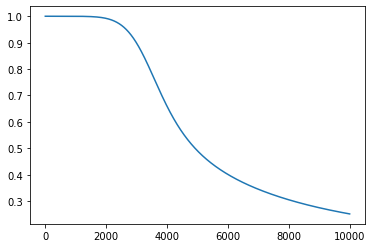

In [46]:
plt.plot(range(0,10000), cost_lst)

In [ ]:
cost_lst[1:3]

In [ ]:
cost_lst2 = nn_model(X, Y, [4, 4, 5, 3], learning_rate = 0.1, epochs = 10000, activations_lst = ["relu", "softmax"], print_cost = False)

In [ ]:
num_of_layers